# Decision Tree & Random Forest Practice
<img src="https://ppt.cc/fAOgjx@.png" border="0">
image source: http://www.titanickiallitas.hu/en/?filter_tag=

### import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus

/Users/yuying/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Data preprocessing

### read data
data source link: https://www.kaggle.com/c/titanic

In [2]:
df = pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Drop relatively useless attributes

In [3]:
df = df.drop('PassengerId', axis = 1)
df = df.drop('Name', axis = 1)
df = df.drop('Ticket', axis = 1)

In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Deal with NaN attributes

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### just fill average age into NaN

In [6]:
age = df['Age']
avgage = age.sum(axis = 0, skipna = True) /len(age)
df['Age'].fillna(avgage, inplace = True)

In [7]:
df = df.drop('Cabin', axis = 1)
df = df.drop('Embarked', axis = 1)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Deal with the remainging string data: sex 
 Male equals 0, female equals 1

In [9]:
sex_map = {'male' : 0, 'female' :1}
df['Sex'] = df['Sex'].map(sex_map)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


## Seperate data into training set and testing(validation) set

In [10]:
df_train = df[:700]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [11]:
df_test = df[700:]
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
700,1,1,1,18.0,1,0,227.5250
701,1,1,0,35.0,0,0,26.2875
702,0,3,1,18.0,0,1,14.4542
703,0,3,0,25.0,0,0,7.7417
704,0,3,0,26.0,1,0,7.8542


## seperate attributes and answer

In [12]:
y = df_train['Survived'].values
df_train = df_train.drop('Survived', 1)

y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# Build Your Decision Tree
You can add more parameters in your DecisionTreeClassifier(). <br>
such as <br>
* DecisionTreeClassifier(max_depth=3)
* DecisionTreeClassifier(max_depth=5,min_samples_split=10)

To see more:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---- <br>
InvocationException: GraphViz's executables not found: <br>
`conda install graphviz`

In [13]:
dtree=DecisionTreeClassifier(max_depth=4)
dtree.fit(df_train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['die','survive'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

In [14]:
dtree.feature_importances_

array([0.19155224, 0.60565481, 0.09127479, 0.05664183, 0.        ,
       0.05487634])

## your decision tree is now in your folder - tree.pdf
<img src="https://ppt.cc/frbhvx@.png" border="0">

# Apply to testing data and then calculate accuracy.

In [15]:
y_test = df_test['Survived'].values
X_test = df_test.drop('Survived', 1)

y_predict = dtree.predict(X_test)

y_predict

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8586387434554974

### if you want to calculate the accuracy by yourself

In [17]:
y_test

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [18]:
acc = 0
for i in range(len(y_test)):
    if y_predict[i] == y_test[i]:
        acc += 1
acc/len(y_test) ## must be the same as the above result

0.8586387434554974

### Try other parameters of trees or preprocess data in another ways by yourself!

* try to deal with the column I thought useless (ex. Ticket?)
* change "Age" to categorical data? (<20:0, >=20&<50:1,>50:2)



# Random Forest
We train a number of decision trees on randomly sampled subsets of the data and average the predictions.
<br>reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = RandomForestClassifier(bootstrap=True, n_estimators=1000, max_depth=4)
clf.fit(df_train, y)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.8324607329842932

## Parameters
We have mostly the same hyperparameters as decision trees but we have an important new one: **n_estimators**.<br>
This controls how many trees in the forest, and correspondingly how big the benenficial effects of ensembling are.<br> The trade-off is computation time - with a very large dataset this might be a problem. With our small dataset it will not be a problem.
### n_estimators : integer, optional (default=10)

In [22]:
from sklearn import model_selection, metrics

In [23]:
def scorer(model, X, y):
    preds = model.predict(X)
    return metrics.accuracy_score(y, preds)

In [24]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]  ## try different n_estimators
cv_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

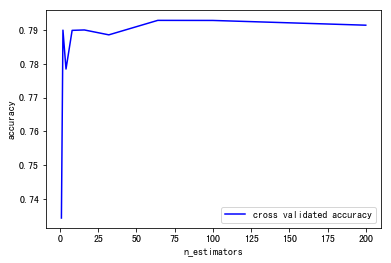

In [25]:
line1= plt.plot(n_estimators, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

In [26]:
best_n_estimators = n_estimators[cv_results.index(max(cv_results))]
print ("best_n_estimators: ", best_n_estimators)
print ("best accuracy: ", max(cv_results))

best_n_estimators:  64
best accuracy:  0.7928880529554136


### max_depth : integer or None, optional (default=None)

In [27]:
cv_results = []
max_depths = np.linspace(1, 32, 32, endpoint=True)  ## try different max_depths
for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=max_depth)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

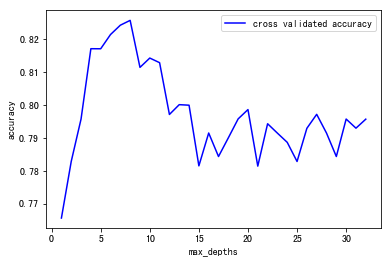

In [28]:
line1= plt.plot(max_depths, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depths')
plt.legend()
plt.show()

In [29]:
best_max_depths = max_depths[cv_results.index(max(cv_results))]
print ("best_max_depths:", best_max_depths)
print ("best accuracy: ", max(cv_results))

best_max_depths: 8.0
best accuracy:  0.825704371154463


### min_samples_split : int, float, optional (default=2)

In [30]:
cv_results = []
min_samples_splits = [2,3,5,10,20,30,40,50,60,70,80]  ## try different min_samples_splits
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=best_max_depths,min_samples_split=min_samples_split)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

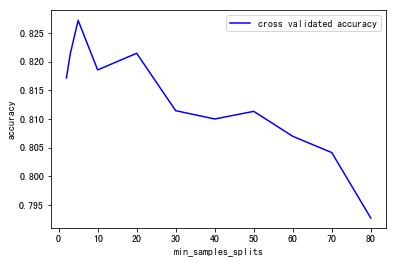

In [31]:
line1= plt.plot(min_samples_splits, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_splits')
plt.legend()
plt.show()

In [32]:
best_min_samples_splits = min_samples_splits[cv_results.index(max(cv_results))]
print ("best_min_samples_splits: ", best_min_samples_splits)
print ("best accuracy", max(cv_results))

best_min_samples_splits:  5
best accuracy 0.8271737672411279


## Try to implement by yourself!
Please use cross validation to find the parameters:
* min_samples_leafs : int, float, optional (default=1)
* max_features : int, float, string or None, optional (default=”auto”)

## Apply the parameters you found to testing set

In [33]:
rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=best_max_depths,min_samples_split=best_min_samples_splits)
rf.fit(df_train, y)
train_pred = rf.predict(df_train)
print ("Training acc:", accuracy_score(y, train_pred))
y_pred = rf.predict(X_test)
print ("Testing acc:", accuracy_score(y_test, y_pred))

Training acc: 0.8971428571428571
Testing acc: 0.8638743455497382
